In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA


Working with Dataset

In [279]:
#load dataset
df = pd.read_csv('./cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
990,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
991,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
992,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [280]:
# checking datatypes
df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [281]:
#dropping 'Index' and 'Patient ID' 
df.drop(columns= ['index', 'Patient Id'], inplace=True)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
990,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
991,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
992,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [282]:
#changing type 'level' to catagorical numerics
df['Level'] = df['Level'].map({'Low':0, 'Medium':1, 'High':2})
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
990,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
991,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
992,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


# Explaratory Data Analysis EDA


High: 2,  Medium: 1,  Low: 0

In [283]:
df['Level'].value_counts()
# High: 2
# Medium: 1
# Low: 0

2    363
1    330
0    301
Name: Level, dtype: int64

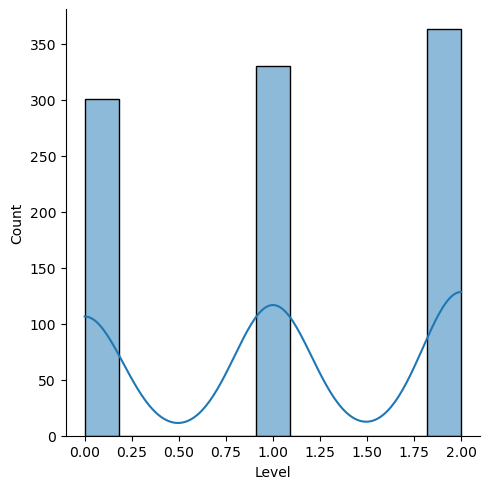

In [284]:
sns.displot(df['Level'], kde=True)

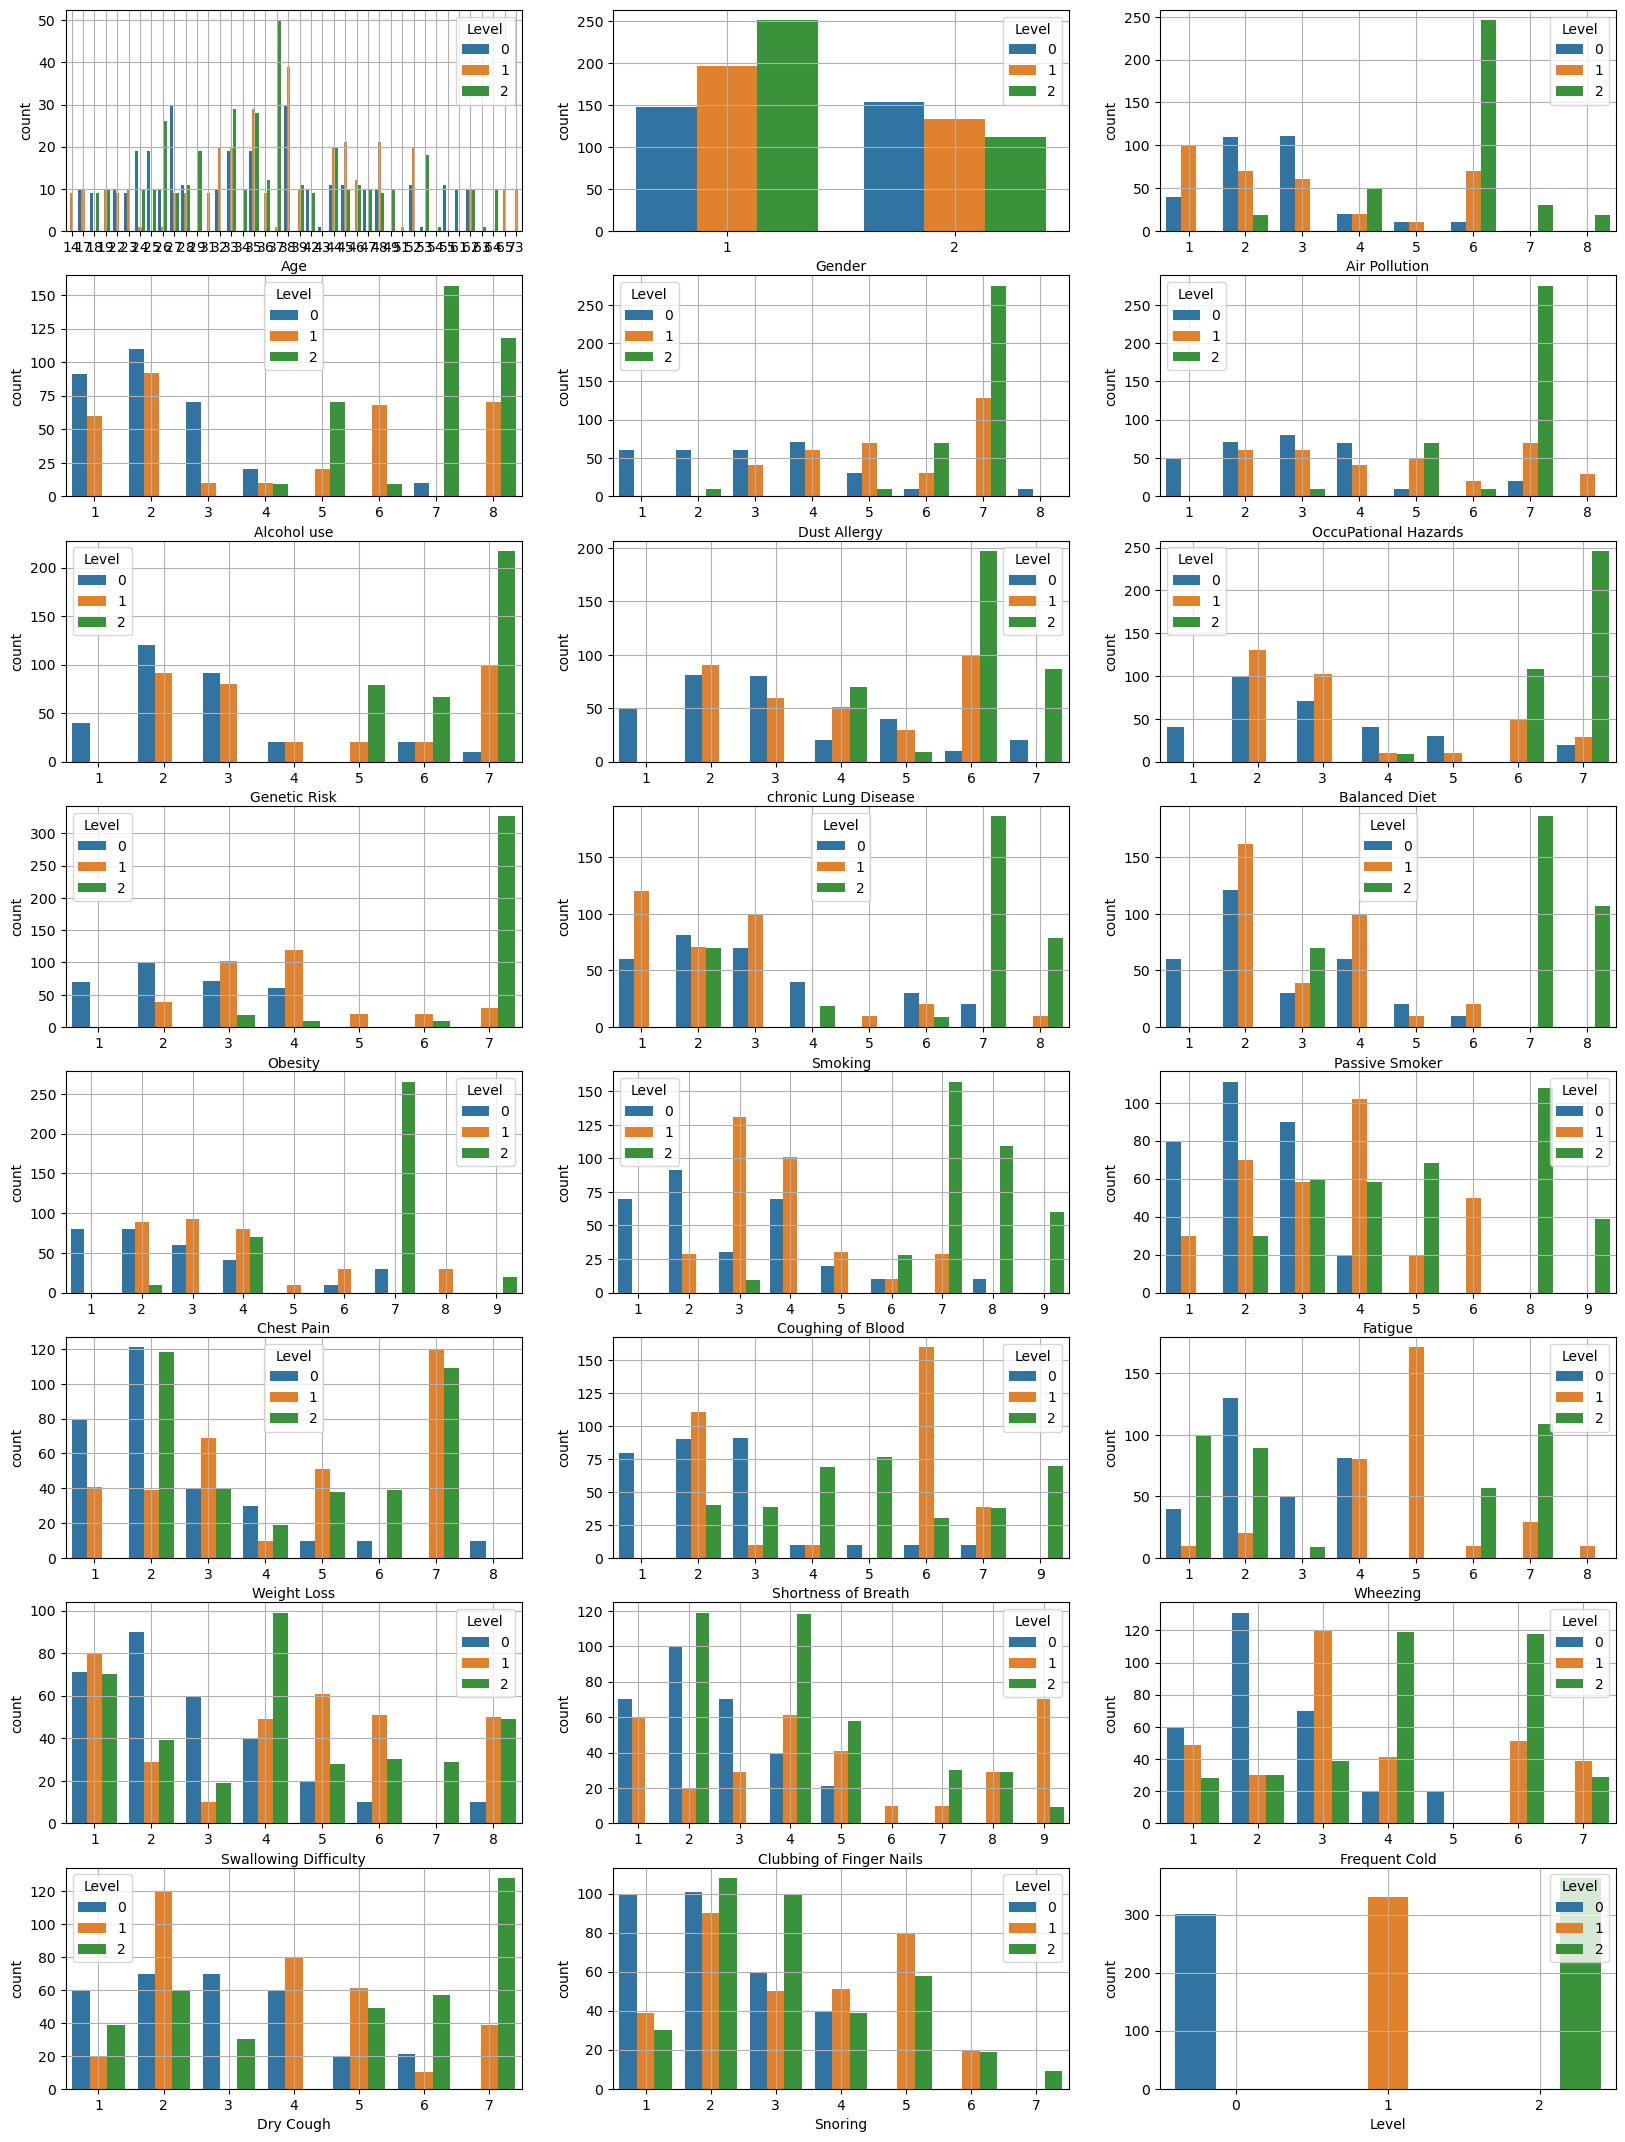

In [285]:
plt.figure(figsize = (20, 27))

for i in range(24):
    plt.subplot(8, 3, i+1)
    sns.countplot(df, x=df.iloc[:, i],hue='Level')
    plt.grid()

Feature selection using correlation matrix

<Axes: >

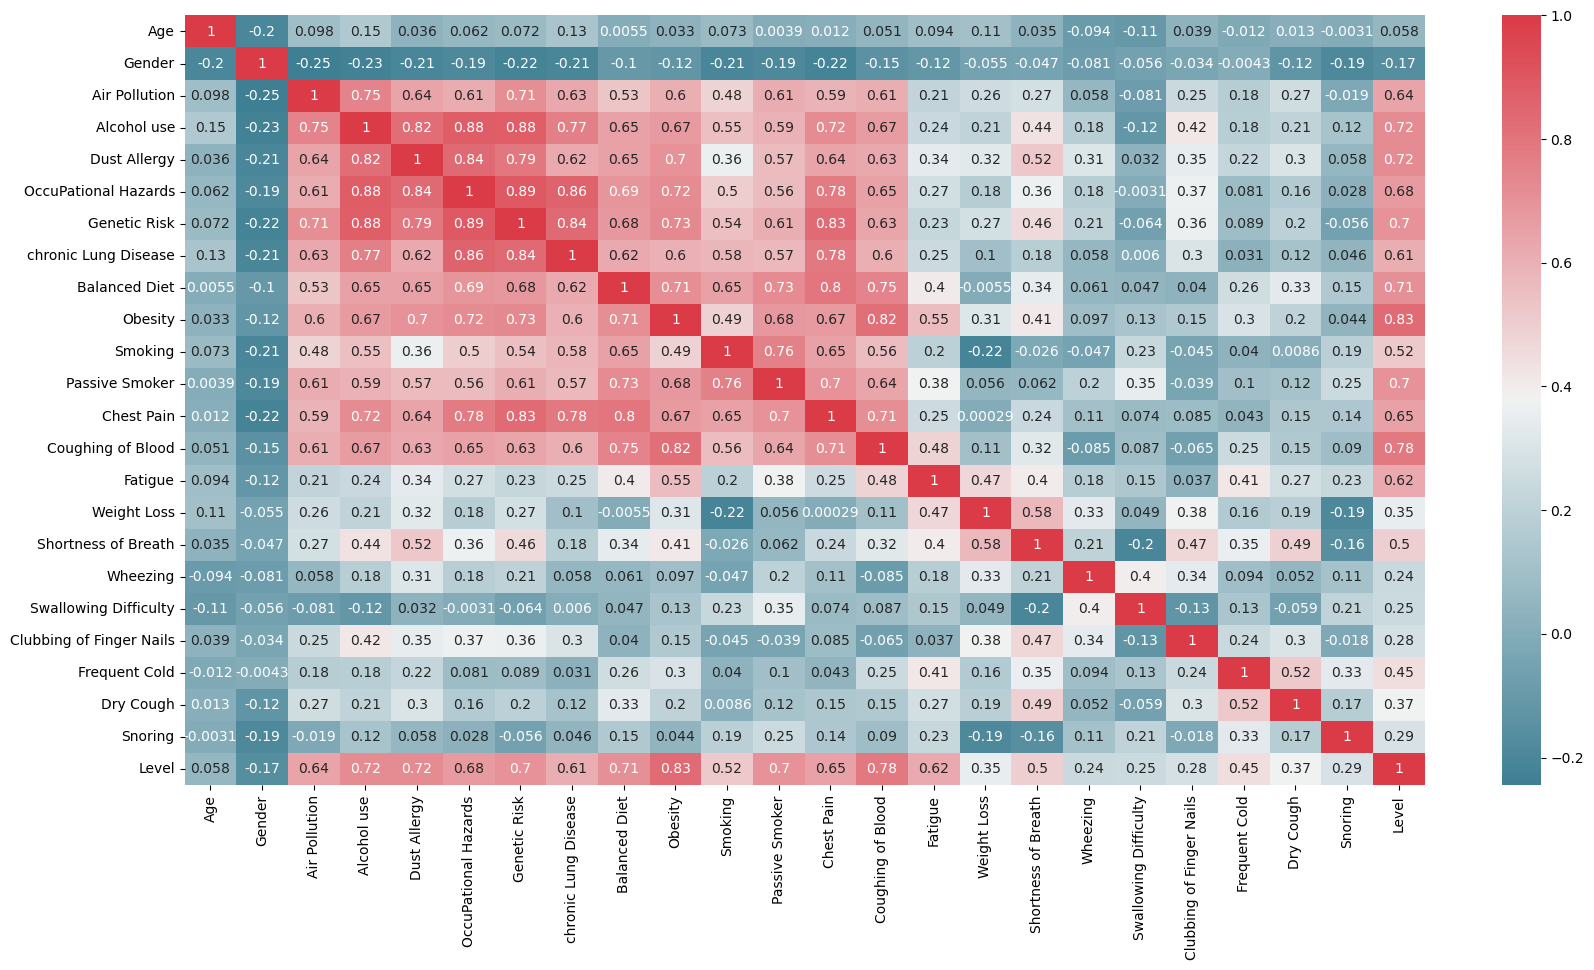

In [286]:
# correlation coefficient
correlation_matrix = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

<Axes: >

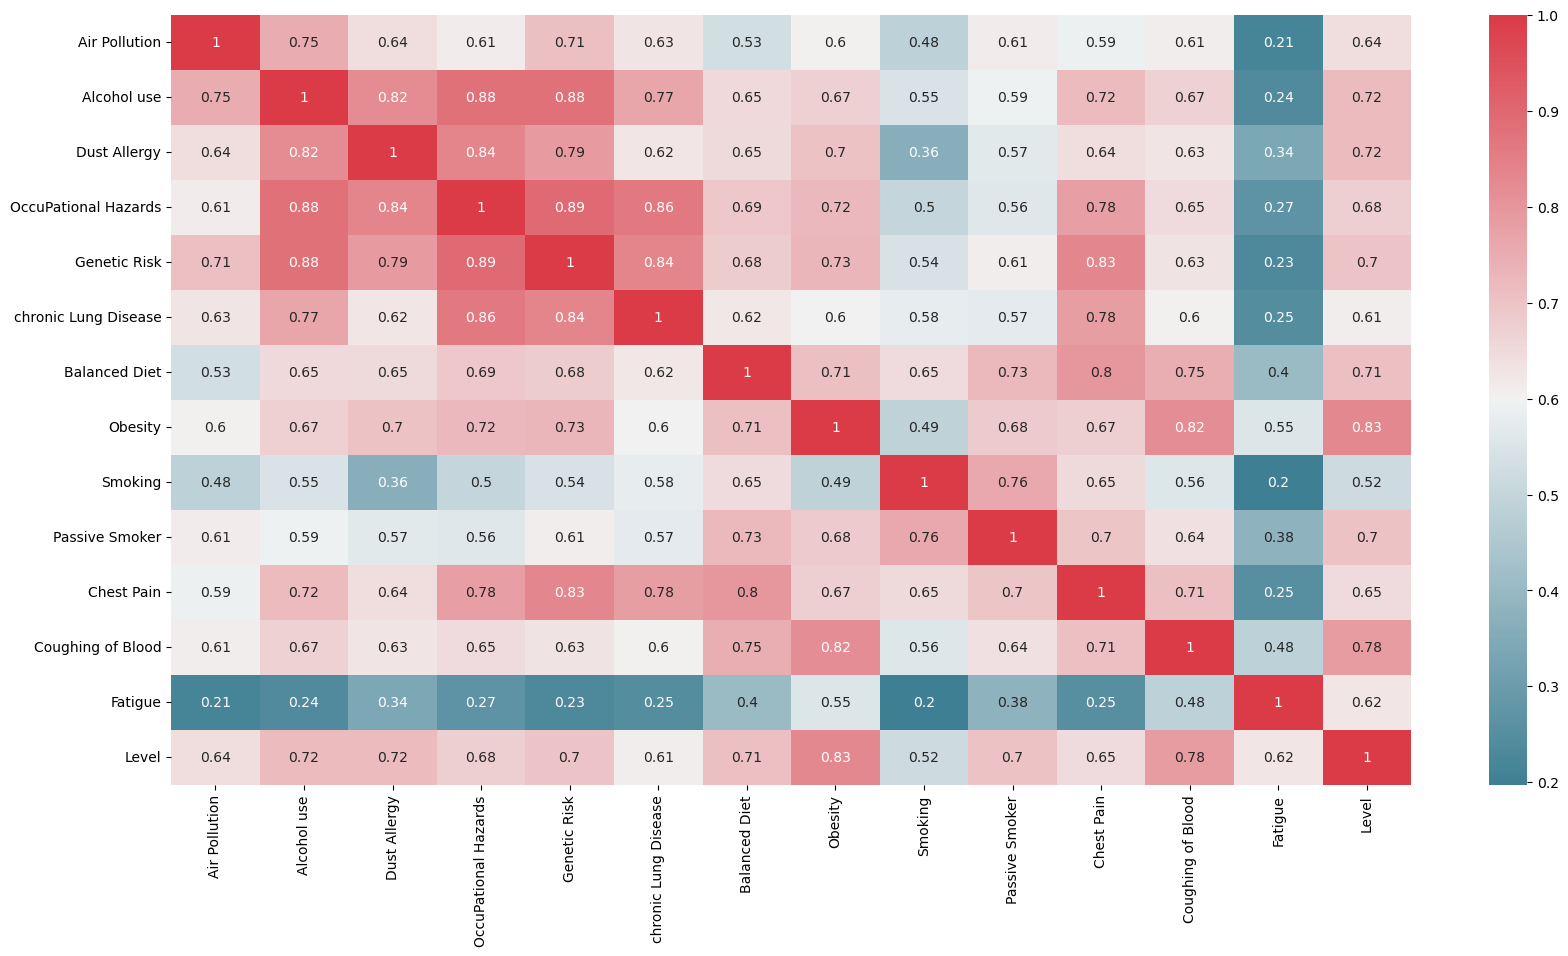

In [287]:
# Selecting Features that have a correlation above 0.5
correlation_with_target = correlation_matrix['Level']
threshold = 0.5
selected_features = correlation_with_target[correlation_with_target > threshold].index.tolist()
df_selected = df[selected_features]
correlation_matrix = df_selected.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))


In [288]:
df_selected

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Level
0,2,4,5,4,3,2,2,4,3,2,2,4,3,0
1,3,1,5,3,4,2,2,2,2,4,2,3,1,1
2,4,5,6,5,5,4,6,7,2,3,4,8,8,2
3,7,7,7,7,6,7,7,7,7,7,7,8,4,2
4,6,8,7,7,7,6,7,7,8,7,7,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,6,7,7,7,7,6,7,7,7,8,7,7,5,2
990,6,8,7,7,7,6,7,7,7,8,7,7,9,2
991,4,5,6,5,5,4,6,7,2,3,4,8,8,2
992,6,8,7,7,7,6,7,7,8,7,7,9,3,2



# Model Selection


In [289]:
df_selected

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Level
0,2,4,5,4,3,2,2,4,3,2,2,4,3,0
1,3,1,5,3,4,2,2,2,2,4,2,3,1,1
2,4,5,6,5,5,4,6,7,2,3,4,8,8,2
3,7,7,7,7,6,7,7,7,7,7,7,8,4,2
4,6,8,7,7,7,6,7,7,8,7,7,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,6,7,7,7,7,6,7,7,7,8,7,7,5,2
990,6,8,7,7,7,6,7,7,7,8,7,7,9,2
991,4,5,6,5,5,4,6,7,2,3,4,8,8,2
992,6,8,7,7,7,6,7,7,8,7,7,9,3,2


Splitting data

In [290]:
#Shuffling Data
import random
df_selected = df_selected.sample(frac=1, random_state=68)
df_selected

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Level
696,3,1,4,2,3,2,3,3,2,2,4,2,2,0
55,2,3,1,3,2,5,2,1,2,1,2,5,3,0
956,6,8,7,7,7,6,2,4,1,2,4,3,2,1
201,3,1,4,2,3,2,3,3,2,2,4,2,2,0
168,1,6,7,8,7,6,7,7,3,4,8,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,6,8,7,7,6,7,7,3,8,7,9,6,5,2
932,3,2,1,3,2,1,3,2,1,2,2,2,2,0
423,6,7,7,7,7,7,6,7,7,7,7,7,8,2
498,3,2,1,3,2,4,5,1,6,2,3,2,4,0


In [291]:
 #splitting data
x = df_selected.drop('Level', axis=1)
y = df_selected['Level']

x.shape, y.shape

((994, 13), (994,))

In [292]:
y

696    0
55     0
956    1
201    0
168    1
      ..
202    2
932    0
423    2
498    0
831    0
Name: Level, Length: 994, dtype: int64

In [293]:
#splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#splitting the data into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.25)

print(x.shape, x_train.shape, x_valid.shape, x_test.shape)

(994, 13) (596, 13) (199, 13) (199, 13)


1. Comparing the model using Cross Validation


In [294]:
X = np.asarray(x)
Y = np.asarray(y)

In [295]:
#list of models
models = [LogisticRegression(max_iter=1000),SVC(kernel='linear'), KNeighborsClassifier(), DecisionTreeClassifier()]

In [322]:
def compare_models_cv(models, X, Y):
    results = []
    for model in models:
        cv_scores = cross_val_score(model, X, Y, cv=5)
        mean_accuracy = cv_scores.mean() * 100
        model_name = type(model).__name__
        results.append((model_name, cv_scores, mean_accuracy))

    result_dataframe = pd.DataFrame(results, columns=['Model', 'CV Scores', 'Mean Accuracy (%)'])

    plt.figure(figsize=(10, 6))
    plt.bar(result_dataframe['Model'], result_dataframe['Mean Accuracy (%)'])
    plt.xlabel('Model')
    plt.ylabel('Mean Accuracy (%)')
    plt.title('Comparison of Models Mean Accuracy')

    for i, acc in enumerate(result_dataframe['Mean Accuracy (%)']):
        plt.text(i, acc + 1, f'{acc:.2f}%', ha='center')

    plt.show()

    return result_dataframe


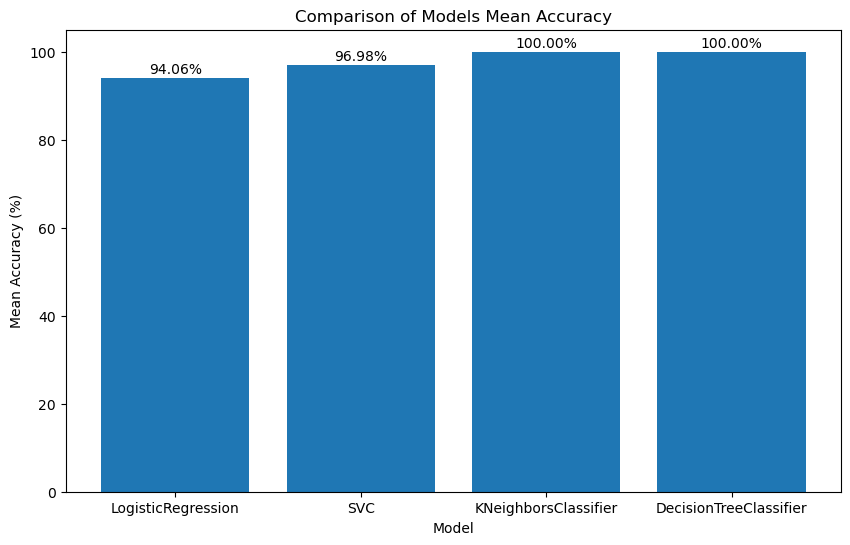

,Model,CV Scores,Mean Accuracy (%)
0,LogisticRegression,"[0.9547738693467337, 0.9547738693467337, 0.959...",94.061723
1,SVC,"[0.9547738693467337, 0.9698492462311558, 0.959...",96.982387
2,KNeighborsClassifier,"[1.0, 1.0, 1.0, 1.0, 1.0]",100.000000
3,DecisionTreeClassifier,"[1.0, 1.0, 1.0, 1.0, 1.0]",100.000000


In [323]:
compare_models_cv(models, X, Y)

2. Comparing the models based on training and validation sets

In [317]:

def fit_and_score(models, x_train, x_test, y_train, y_test):
   
    results = []
    model_scores = {}
    
    for model in models:
        model_name = type(model).__name__
        model.fit(x_train, y_train)
        model_scores[model_name] = model.score(x_test, y_test) * 100
        results.append((model_name, model_scores[model_name]))
    
    result_dataframe = pd.DataFrame(results, columns=['Model', 'Accuracy Score (%)'])
    return result_dataframe

In [299]:
def plot_accuracy_scores(results):
    models = results['Model']
    scores = results['Accuracy Score (%)']

    # Plotting the bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(models, scores)
    plt.xlabel('Model')
    plt.ylabel('Accuracy Score (%)')
    plt.title('Accuracy Scores of Different Models')

    # Adding the accuracy scores as text labels on top of the bars
    for i, score in enumerate(scores):
        plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

    # Displaying the plot
    plt.tight_layout()
    plt.show()

In [300]:
fit_and_score(models, x_train, x_valid, y_train, y_valid)

,Model,Accuracy Score (%)
0,LogisticRegression,91.457286
1,SVC,92.964824
2,KNeighborsClassifier,100.000000
3,DecisionTreeClassifier,100.000000


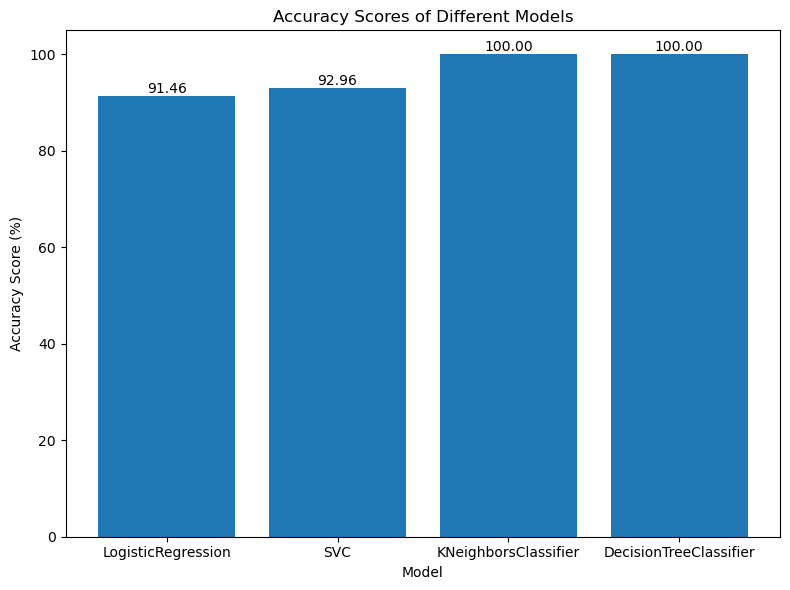

In [301]:
results = fit_and_score(models, x_train, x_valid, y_train, y_valid)
plot_accuracy_scores(results)

# Model Training

Support Vector classifier SVC

In [325]:
model = SVC()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9748743718592965

# Model Evaluation

In [304]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High'] ))

              precision    recall  f1-score   support

         Low       0.95      0.97      0.96        60
      Medium       0.97      0.95      0.96        60
        High       1.00      1.00      1.00        79

    accuracy                           0.97       199
   macro avg       0.97      0.97      0.97       199
weighted avg       0.97      0.97      0.97       199



Confusion Matrix

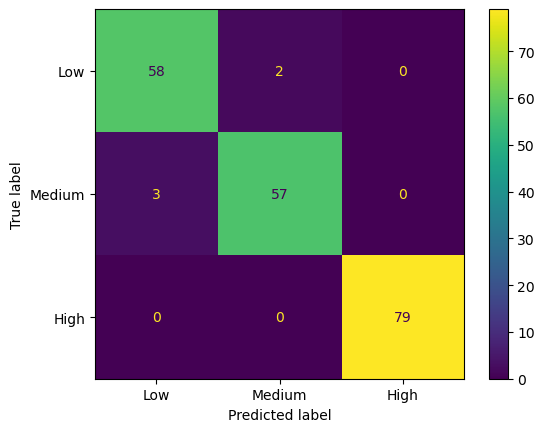

In [305]:

c_matrix = confusion_matrix(y_test, y_pred)
c_matrix = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=['Low', 'Medium', 'High'])
c_matrix.plot()


# Model Visualization

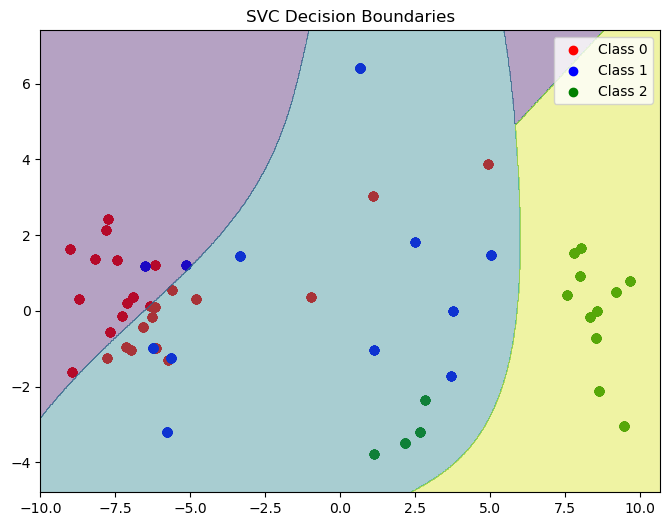

In [327]:

model.fit(X, y)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# decision boundaries
h = 0.02  
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# scatter plot
plt.figure(figsize=(8, 6))
classes = np.unique(y)
colors = ['red', 'blue', 'green']
for class_label, color in zip(classes, colors):
    class_indices = np.where(y == class_label)
    plt.scatter(X_pca[class_indices, 0], X_pca[class_indices, 1], color=color, label=f'Class {class_label}')

# decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)

plt.title('SVC Decision Boundaries')
plt.legend()
plt.show()

# Prdictive System

In [329]:
input_data = (1,6,7,5,3,2,6,2,3,3,2,2,3)
input_data_as_numpy_array= np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The likelihood of having Lung Cancer is LOW')
elif(prediction[0]== 1):
  print('The likelihood of having Lung Cancer is MEDIUM')
elif(prediction[0]== 2):
  print('The likelihood of having Lung Cancer is HIGH')

[1]
The likelihood of having Lung Cancer is MEDIUM
